#Install mmSegmentation requirements

In [1]:
# Install PyTorch
!pip install torch==1.12.0 torchvision --extra-index-url https://download.pytorch.org/whl/cu113
# Install MMCV
!pip install openmim
!mim install mmcv-full==1.6.0
#clone github repository
!git clone https://github.com/open-mmlab/mmsegmentation.git 
#install all requirements
!pip install -qr mmsegmentation/requirements.txt 
%cd /content/mmsegmentation
#install mmsegmentation in develop mode
!python setup.py develop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 235 kB 65.4 MB/s 
     |████████████████████████████████| 51 kB 7.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     |████████████████████████████████| 40.1 MB 10.2 MB/s 
     |████████████████████████████████| 190 kB 26.0 MB/s 
Cloning into 'mmsegmentation'...
remote: Enumerating objects: 10171, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 10171 (delta 10), reused 10 (delta 0), pack-reused 10121
Receiving objects: 100% (10171/10171), 14.01 Mi

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Database Things


*   Databasemizi kayıt etmemiz lazım. Bunun için mmsegmentation -> mmseg -> datasets konuma gidip chase_db1.py gibi bir py oluşturup classlarımızı tanımlıyoruz.
*   Liste öğesi






In [37]:
#declare global variables
root_dir= '/content/mmsegmentation/data/'
data_root= "/content/drive/MyDrive/Colab_Dataset/"
#dataset= "ground_truth4_renkli_oneClass"
dataset= "ground_truth_CatAndDog_Together_blackMask"

#dataset= "mendeley"

In [38]:
import os

#script to extract data from zip files and create the directory structure for mendeley
#!python /content/focal_phi_loss_mmsegmentation/tools/convert_datasets/mendeley.py /content/focal_phi_loss_mmsegmentation/dataset_files/mendeley/train_imgs.zip /content/focal_phi_loss_mmsegmentation/dataset_files/mendeley/train_gt.zip /content/focal_phi_loss_mmsegmentation/dataset_files/mendeley/val_imgs.zip /content/focal_phi_loss_mmsegmentation/dataset_files/mendeley/val_gt.zip 

#check file counts
train_imgs= data_root + dataset+'/img_dir/train'
val_imgs= data_root + dataset +'/img_dir/val'
train_gt= data_root + dataset+'/ann_dir/train'
val_gt= data_root + dataset+'/ann_dir/val'

#print the file count
print(len(os.listdir(train_imgs)))
print(len(os.listdir(val_imgs)))
print(len(os.listdir(train_gt)))
print(len(os.listdir(val_gt)))

17
4
17
4


In [39]:
# define class and plaette for better visualization
classes = ('Background', 'Cat', 'Dog')
palette = [[1, 1, 1], [2, 2, 2], [3,3,3]]

In [40]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module()
class ahmet1507(CustomDataset):
  CLASSES = classes
  PALETTE = palette
  def __init__(self, split, **kwargs):
    super().__init__(img_suffix='.jpg', seg_map_suffix='.png', 
                     split=split, **kwargs)
    assert osp.exists(self.img_dir) 


KeyError: ignored

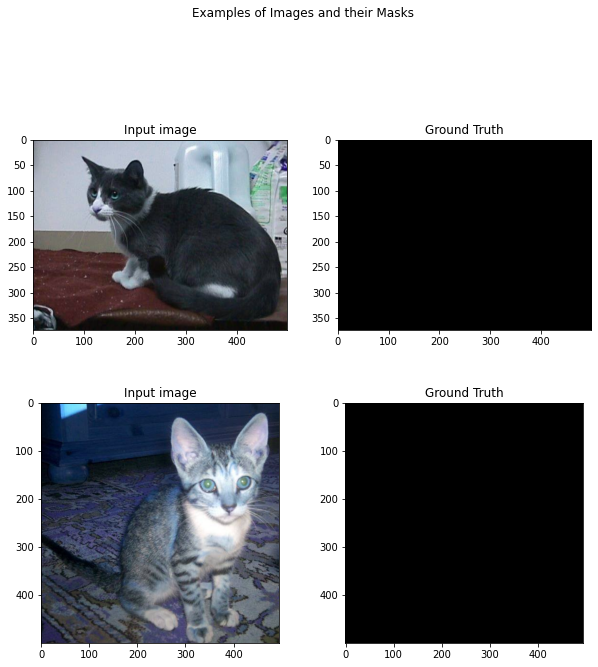

In [41]:
import mmcv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import os
import glob


PATH_TO_TRAIN_IMAGES_DIR= data_root+dataset+'/img_dir/train'
PATH_TO_LABEL_IMAGES_DIR= data_root+dataset+'/ann_dir/train'

TRAIN_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TRAIN_IMAGES_DIR, "*.jpg"))
LABEL_PATHS= glob.glob(os.path.join(PATH_TO_LABEL_IMAGES_DIR, "*.png"))

TRAIN_IMAGE_PATHS.sort()
LABEL_PATHS.sort()

palette = [[1, 1, 1], [2, 2, 2],[3, 3, 3]] #dataset palette

display_num = 3
r_choices = np.random.choice(len(TRAIN_IMAGE_PATHS), display_num)

#visualize any 5 random images and their mask images
plt.figure(figsize=(10, 15))
for i in range(0, display_num, 2):
  img_num = r_choices[i // 2]
  img = mmcv.imread(TRAIN_IMAGE_PATHS[img_num])
  label = mmcv.imread(LABEL_PATHS[img_num])

  plt.subplot(display_num, 2, i + 1)
  plt.imshow(img)
  plt.title("Input image")

  plt.subplot(display_num, 2, i + 2)
  plt.imshow(label)
  plt.title("Ground Truth")


plt.suptitle("Examples of Images and their Masks")
plt.show()

# Run Inference with MMSeg trained weight

In [42]:
!mkdir checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P checkpoints


mkdir: cannot create directory ‘checkpoints’: File exists
--2022-07-27 12:58:15--  https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.41
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196205945 (187M) [application/octet-stream]
Saving to: ‘checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth.1’

pspnet_r50-d8_512x1 100%[===================>] 187.12M  8.31MB/s    in 23s     

2022-07-27 12:58:39 (8.16 MB/s) - ‘checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth.1’ saved [196205945/196205945]



In [43]:
from mmcv import Config
cfg = Config.fromfile('configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py')

In [44]:
from mmseg.apis import set_random_seed
from mmseg.utils import get_device
import torch

cfg_data_root = data_root+dataset
train_img_dir = 'img_dir/train'
train_ann_dir = 'ann_dir/train'
val_img_dir = 'img_dir/val'
val_ann_dir = 'ann_dir/val'

# Since we use ony one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg

# modify num classes of the model in decode head
cfg.model.decode_head.num_classes = 2
cfg.model.auxiliary_head.num_classes = 2

# Modify dataset type and path
cfg.dataset_type = 'ahmet1507'
cfg.data_root = cfg_data_root

#batch size
cfg.data.samples_per_gpu = 2
cfg.data.workers_per_gpu=2

cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (256, 256)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(320, 240), ratio_range=(0.5, 2.0)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(320, 240),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]


cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = train_img_dir
cfg.data.train.ann_dir = train_ann_dir
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = None

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = val_img_dir
cfg.data.val.ann_dir = val_ann_dir
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = None

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = val_img_dir
cfg.data.test.ann_dir = val_ann_dir
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = None

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = 'checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

cfg.runner.max_iters = 200
cfg.log_config.interval = 10
cfg.evaluation.interval = 200
cfg.checkpoint_config.interval = 200

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device = get_device()

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='PSPHead',
        in_channels=2048,
        in_index=3,
        channels=512,
        pool_scales=(1, 2, 3, 6),
        dropout_ratio=0.1,
        num_classes=2,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=dict(
            type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0)),
    auxiliary_head=dict(
        type='FCNHead',
        in_channels=1024,
        in_index=2,
        channels=256,
        num_convs=1,
        concat_input=F

In [45]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor


# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_segmentor(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, 
                meta=dict())

2022-07-27 12:59:00,573 - mmseg - INFO - Loaded 17 images
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '
2022-07-27 12:59:01,172 - mmseg - INFO - Loaded 4 images
2022-07-27 12:59:01,179 - mmseg - INFO - load checkpoint from local path: checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
2022-07-27 12:59:01,332 - mmseg - WARNING - The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a pa

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 4/4, 2.3 task/s, elapsed: 2s, ETA:     0s

2022-07-27 13:00:33,378 - mmseg - INFO - per class results:
2022-07-27 13:00:33,380 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| Background | 61.58 |  70.5 |
|    Cat     | 62.54 | 83.53 |
|    Dog     |  nan  |  nan  |
+------------+-------+-------+
2022-07-27 13:00:33,381 - mmseg - INFO - Summary:
2022-07-27 13:00:33,384 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 76.6 | 62.06 | 77.01 |
+------+-------+-------+
2022-07-27 13:00:33,387 - mmseg - INFO - Iter(val) [4]	aAcc: 0.7660, mIoU: 0.6206, mAcc: 0.7701, IoU.Background: 0.6158, IoU.Cat: 0.6254, IoU.Dog: nan, Acc.Background: 0.7050, Acc.Cat: 0.8353, Acc.Dog: nan


In [48]:
#create direcrtory for storing results
!mkdir /content/mmsegmentation/data/work_dirs/results
!mkdir /content/mmsegmentation/data/work_dirs/results/masks
!mkdir /content/mmsegmentation/data/work_dirs/results/overlays

4
saving val


/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


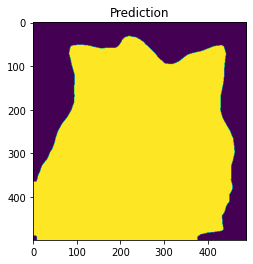

<Figure size 576x432 with 0 Axes>

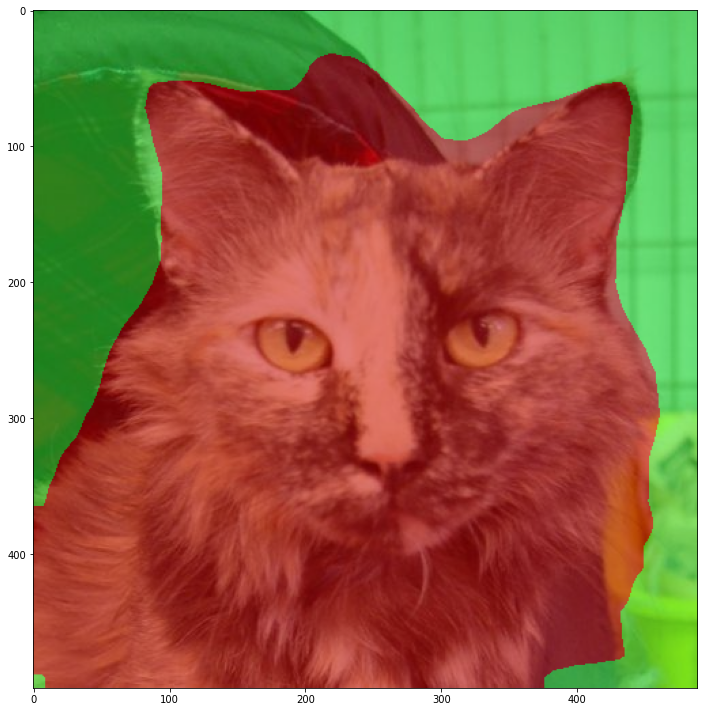

saving val


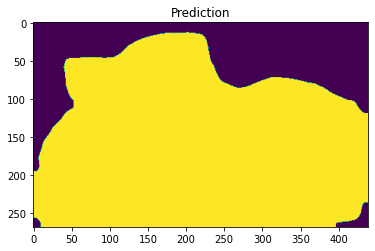

<Figure size 576x432 with 0 Axes>

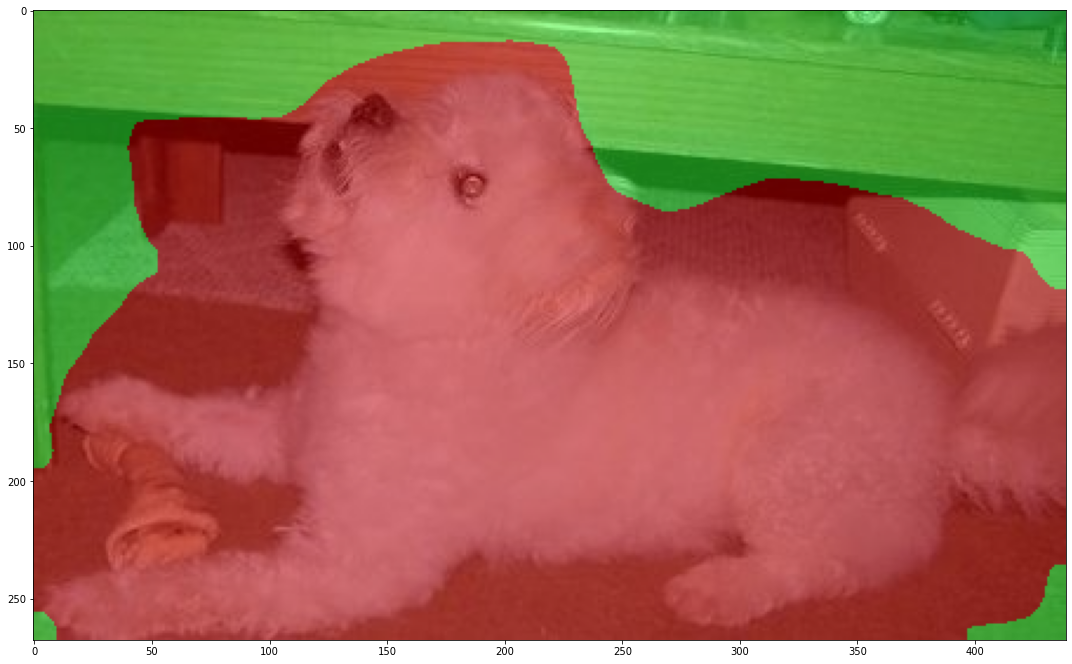

saving val


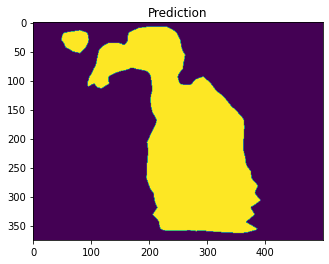

<Figure size 576x432 with 0 Axes>

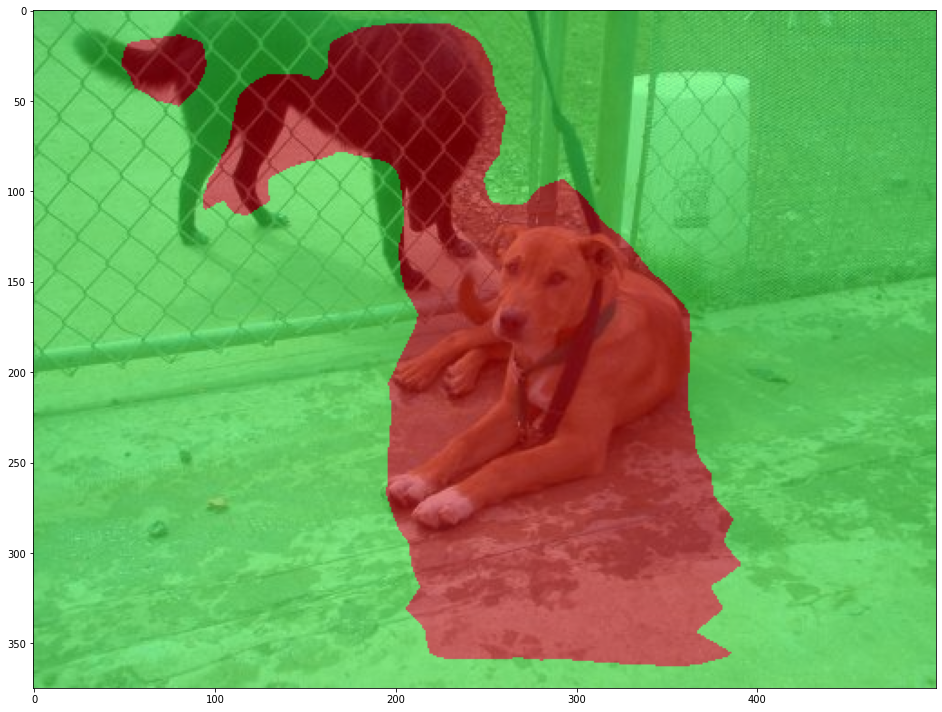

saving val


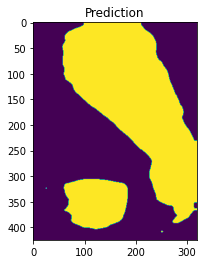

<Figure size 576x432 with 0 Axes>

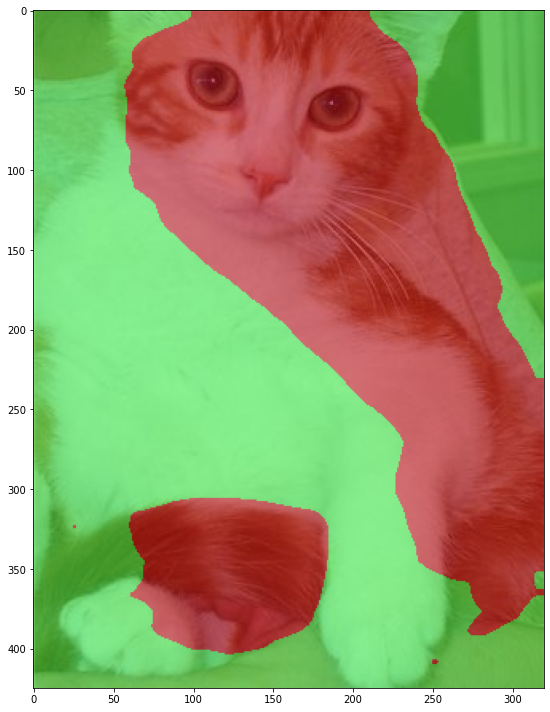

In [68]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
import mmcv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import os
import glob
import zipfile

PATH_TO_TEST_IMAGES_DIR= data_root+dataset+"/img_dir/val"

PATH_TO_LABEL_IMAGES_DIR= data_root+dataset+"/ann_dir/val"
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.jpg"))
LABEL_PATHS= glob.glob(os.path.join(PATH_TO_LABEL_IMAGES_DIR, "*.png"))

TEST_IMAGE_PATHS.sort()
LABEL_PATHS.sort()

checkpoint= 'work_dirs/tutorial/iter_200.pth' #checkpoint path
#model = init_segmentor(cfg, checkpoint, device='cuda:0')
model.cfg = cfg

palette = [[51, 255, 51], [204, 0, 0], [0,0,255]]
#120, 120, 120
print(len(TEST_IMAGE_PATHS))

for i in range(0, len(TEST_IMAGE_PATHS)):
  img = mmcv.imread(TEST_IMAGE_PATHS[i])
  label = mmcv.imread(LABEL_PATHS[i])
  result = inference_segmentor(model, img)
  img_name= LABEL_PATHS[i].split("/")[7] #FOR MASK
  arr= np.array(result)
  arr=np.squeeze(arr)


  plt.imshow(arr)
  plt.title("Prediction")


  image_file_name= root_dir+"/work_dirs/results/masks/"+img_name
  plt.savefig(image_file_name)
  print("saving "+img_name)
  i= i+1

  plt.figure(figsize=(8, 6))
  show_result_pyplot(model, img, result,palette)